In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [87]:
### gradient descent (in general)

In [88]:
X = np.arange(10)
Y = (X-5)**2

print(X, Y)

[0 1 2 3 4 5 6 7 8 9] [25 16  9  4  1  0  1  4  9 16]


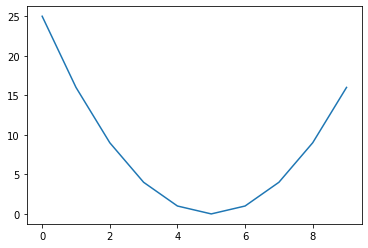

In [89]:
plt.plot(X, Y)
plt.show()

1.0
1.8
2.4400000000000004
2.9520000000000004
3.3616
3.68928
3.9514240000000003
4.1611392
4.32891136
4.4631290880000005
4.570503270400001
4.65640261632
4.725122093056
4.7800976744448
4.82407813955584
4.859262511644672
4.8874100093157375
4.90992800745259
4.927942405962073
4.942353924769658
4.953883139815726
4.9631065118525814
4.9704852094820655
4.976388167585652
4.981110534068522
4.984888427254818
4.987910741803854
4.990328593443083
4.992262874754466
4.993810299803573
4.995048239842858
4.996038591874287
4.996830873499429
4.9974646987995435
4.997971759039634
4.9983774072317075
4.998701925785366
4.998961540628293
4.999169232502634
4.999335386002107
4.999468308801686
4.9995746470413485
4.999659717633079
4.9997277741064625
4.99978221928517
4.999825775428136
4.999860620342509
4.999888496274007
4.999910797019206
4.999928637615365


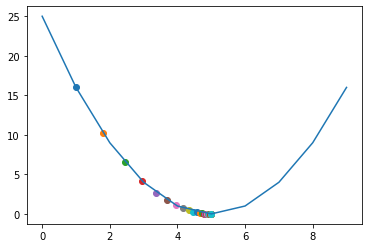

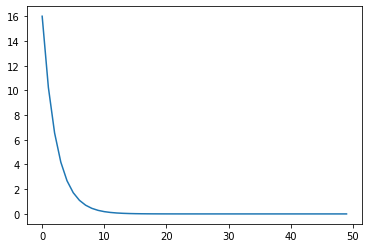

In [90]:
x = 0
lr = 0.1
error = []
plt.plot(X, Y)
#50 steps in downhill
for i in range(50):
    grad = 2*(x-5)
    x = x - lr*grad
    y = (x-5)**2
    error.append(y)
    plt.scatter(x, y)
    print(x)
plt.show()
plt.plot(error)
plt.show()

In [91]:
### hard work pays off challenge

In [92]:
#load data
X = pd.read_csv("./Training Data/Linear_X_Train.csv")
y = pd.read_csv("./Training Data/Linear_Y_Train.csv")

X = X.values
y = y.values

print(X.shape, y.shape)

(3750, 1) (3750, 1)


In [93]:
#normalise data
u = X.mean()
std = X.std()
X = (X-u)/std

print(u, std)

-0.03779466168006855 0.9920801322508517


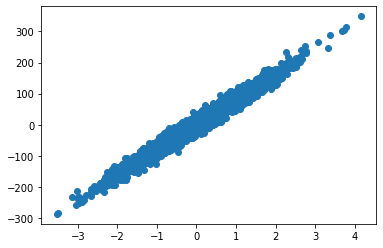

In [94]:
#visualise data
plt.scatter(X, y)
plt.show()

In [95]:
#Linear regression
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_- y)*X[i]
    return grad/m

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m

def gradientDescent(X, Y, max_steps=100, learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append(theta)
        error_list.append(e)
        
    return theta, error_list, theta_list

In [99]:
theta, error_list, theta_list = gradientDescent(X, y)

No handles with labels found to put in legend.


[[ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 [ 0.6838508  79.90361453]
 

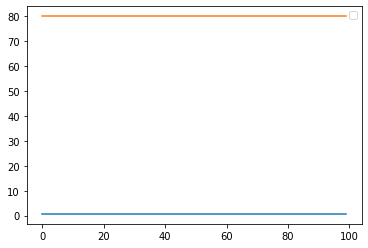

In [103]:
theta_list = np.array(theta_list)
print(theta_list)

plt.plot(theta_list[:,0])
plt.plot(theta_list[:,1])
plt.legend()
plt.show()

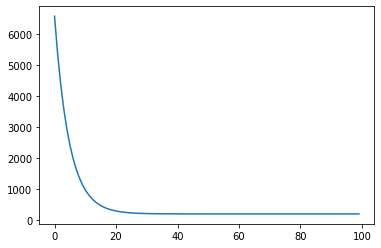

[ 0.6838508  79.90361453]


In [65]:
plt.plot(error_list)
plt.show()

In [117]:
y_ = hypothesis(X, theta)

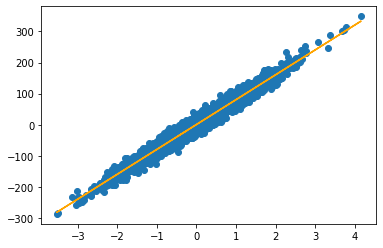

In [67]:
#plot training data and predictions
plt.scatter(X, y)
plt.plot(X, y_, color='orange')
plt.show()

In [68]:
# load test data
X_test = pd.read_csv("./Test Cases/Linear_X_Test.csv").values
y_test = hypothesis(X_test, theta)

y_test.shape

(1250, 1)

In [69]:
#submit predictions
df = pd.DataFrame(data=y_test, columns=["y"])

df.to_csv('y_predictions.csv', index=False)
print(df)

               y
0    -149.370696
1     -68.754940
2    -201.486870
3     221.234243
4      47.906897
...          ...
1245  -12.744630
1246   75.171802
1247   10.912138
1248  -21.532358
1249  -53.684600

[1250 rows x 1 columns]


In [70]:
#computing score (R2 score)
def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = 1 - num/denom
    return score*100

In [71]:
r2_score(y, y_)

97.09612226971643

In [72]:
### visualising loss function. gradient function, theta updates

In [73]:
theta

array([ 0.6838508 , 79.90361453])

In [105]:
T0 = np.arange(-40, 40, 1)
T1 = np.arange(40, 120, 1)

T0, T1 = np.meshgrid(T0, T1)

J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y_ - y)**2)/Y.shape[0]
        
print(J.shape)

(80, 80)


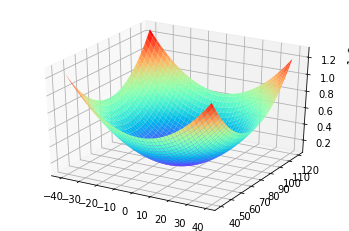

In [106]:
# visualise J
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

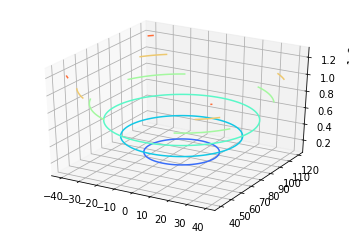

In [107]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()

In [108]:
# trajectory traced by theta updated in loss function

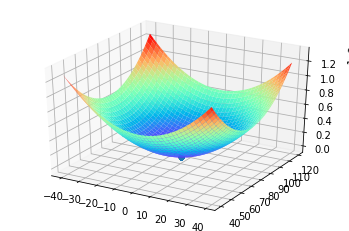

In [110]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list)
plt.show()

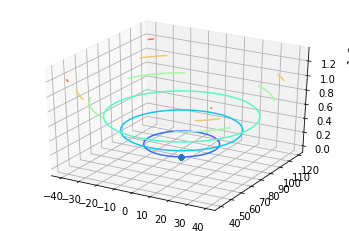

In [112]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list)
plt.show()

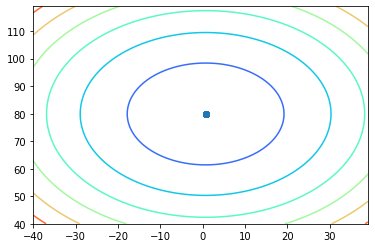

In [114]:
plt.contour(T0, T1, J, cmap="rainbow")
plt.scatter(theta_list[:,0], theta_list[:,1])
plt.show()

In [116]:
np.save("theta_list.npy", theta_list)